In [14]:
# Import relevant libraries.
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
from dateutil.relativedelta import relativedelta
from scipy import stats
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Ross\Documents\code\notebooks\assessment2\repd-january-2023.csv")
df.head()

,Old Ref ID,Ref ID,Record Last Updated (dd/mm/yyyy),Operator (or Applicant),Site Name,Technology Type,Storage Type,Storage Co-location REPD Ref ID,Installed Capacity (MWelec),CHP Enabled,...,Appeal Refused,Appeal Granted,Planning Permission Granted,Secretary of State - Intervened,Secretary of State - Refusal,Secretary of State - Granted,Planning Permission Expired,Under Construction,Operational,Heat Network Ref
0,N00053B,1,07/07/2009,RWE npower,Aberthaw Power Station Biomass,Biomass (co-firing),NaN,NaN,35.0,No,...,NaN,NaN,03/09/2004,NaN,NaN,NaN,NaN,01/05/2006,01/05/2007,NaN
1,AA110,2,20/11/2017,Orsted (formerly Dong Energy) / Peel Energy,Hunterston - cofiring,Biomass (co-firing),NaN,NaN,170.0,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B0730,3,04/06/2020,Scottish and Southern Energy (SSE),Ferrybridge Multifuel 2 (FM2),EfW Incineration,NaN,NaN,70.0,No,...,NaN,NaN,28/10/2015,NaN,NaN,NaN,28/10/2020,01/09/2016,20/12/2019,NaN
3,1106000,4,18/12/2003,Energy Power Resources,Thetford Biomass Power Station,Biomass (dedicated),NaN,NaN,38.5,No,...,NaN,NaN,05/05/1995,NaN,NaN,NaN,NaN,NaN,02/10/1998,NaN
4,2047000,5,29/09/2005,Agrigen,Nunn Mills Road Biomass Plant,Biomass (dedicated),NaN,NaN,8.8,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Dates are stored as objects (strings), so these should be converted to dates.


# Add column calculating difference in days between date of permission submitted
# and granted.

df['Planning Application Submitted']= pd.to_datetime(df['Planning Application Submitted'], dayfirst=True)
df['Planning Permission Granted']= pd.to_datetime(df['Planning Permission Granted'], dayfirst=True)

df['time_to_approve'] =  df['Planning Permission Granted'] - df['Planning Application Submitted']
df['time_to_approve'] = df['time_to_approve'] / np.timedelta64(1,'D')



array([[<AxesSubplot:title={'center':'time_to_approve'}>]], dtype=object)

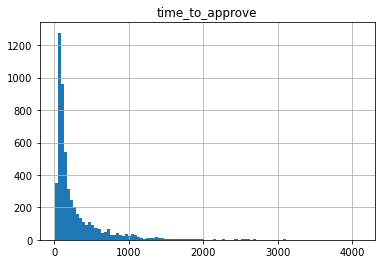

In [17]:
# Some time_to_approve values are false - these contain erroneous dates and should be excluded.

df_time = df[df.time_to_approve > 0]

df_time.describe()

df_time.hist(column='time_to_approve', bins=100)

<AxesSubplot:xlabel='time_to_approve', ylabel='Count'>

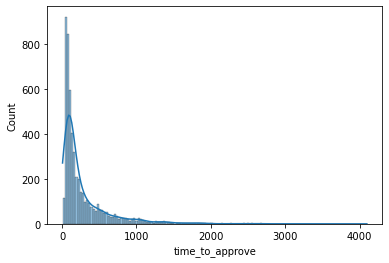

In [18]:
# Seaborn histplot
sns.histplot(data=df_time, x='time_to_approve', kde=True)

In [8]:
# Summary stats for df_time
df_time.describe()


ModeResult(mode=array([56.]), count=array([135]))

In [13]:
# Mode can be more representative due to skewed nature of distribution.
x = stats.mode(df_time['time_to_approve'])
x

ModeResult(mode=array([56.]), count=array([135]))

<AxesSubplot:>

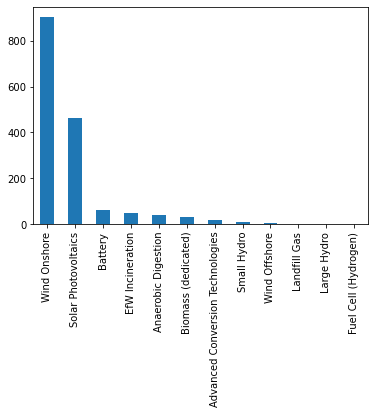

In [21]:
# Create df for only Planning Appeals Refused.

df_plan_ref = df[df['Planning Permission Refused'].notnull()]
df_plan_ref

pd.value_counts(df_plan_ref['Technology Type']).plot.bar()

<AxesSubplot:title={'center':'Sec of State Refusal'}>

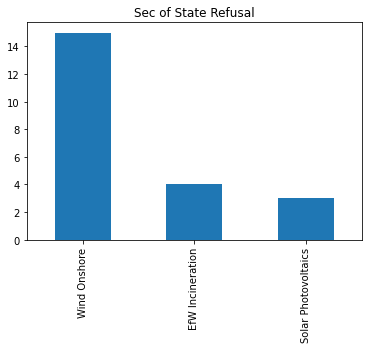

In [25]:
# Create df for only Sec of State refusals.

df_sec_ref = df[df['Secretary of State - Refusal'].notnull()]
df_sec_ref

pd.value_counts(df_sec_ref['Technology Type']).plot.bar(title='Sec of State Refusal')
